# Effect of Time and User Characteristics on<br>Bike Share Trip Counts and Durations
## by Rafeek Abadir

## Investigation Overview

In this investigation, I will look into the effect of the trip start time and user characteristics on trip duration and count. Trip start-time has three attributes that I will focus on, namely: Day, Day of the week, and Hour.

## Dataset Overview

The dataset consists of 183,142 observations of bike-share trips in the duration between 1st - 28th of Feb 2019. Each observation shows the trip duration, trip start time and location, trip end time and location, and characteristics of the user. 

I have removed 8337 observations due to unrealistic values and missing data.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar as cl

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# removing columns not used
df.drop(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 
         'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude',
         'end_time', 'bike_id'], axis=1, inplace=True)

# Adjusting data types
df.start_time=pd.to_datetime(df.start_time)

# Adjusting time units from seconds to minutes
df['duration_min']=df.duration_sec/60

In [3]:
# Dropping rows with nulls
df.dropna(inplace=True)

# Adding new columns for Day, Weekday, and Hour
df['day'] = df.start_time.dt.day
df['hour'] = df.start_time.dt.hour
df['weekday'] = df.start_time.dt.weekday

# Adding a column for user age
df['age'] = 2019 - df.member_birth_year #data was collected in 2019


df.drop(df[df.age>100].index, axis=0, inplace=True)

## Duration Distribution

Trip duration in the dataset covers a large span, from 1 minute to 1410 minutes, when plotted on a logarithmic scale it the distribution takes a unimodal shape and is right-skewed.

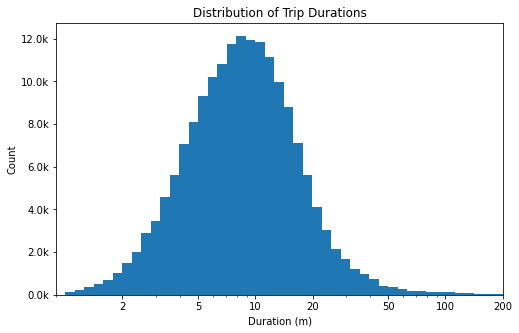

In [4]:
bin_size = .05
bins = 10**np.arange(0, np.log10(df.duration_min.max())+bin_size, bin_size)
plt.figure(figsize=[8,5])
plt.hist(data=df, x='duration_min', bins=bins);
#plt.xlim(0, 50)
plt.xscale('log')
plt.xlabel('Duration (m)');
plt.title('Distribution of Trip Durations')
x_ticks = [ 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
x_labels = ['{}'.format(v) for v in x_ticks]
plt.xticks(x_ticks, x_labels);
y_ticks = np.arange(0, 13000, 2000)
y_labels = ['{}'.format(str(v/1000) + 'k') for v in y_ticks];
plt.yticks(y_ticks, y_labels);
plt.ylabel('Count')
plt.xlim(.9, 200);

## Distribution of Trips over Day Hours

The distribution takes a bimodal shape with two peaks at 8 am and 5 pm, which makes sense, as we expect more people starting their trips at the rush hours.

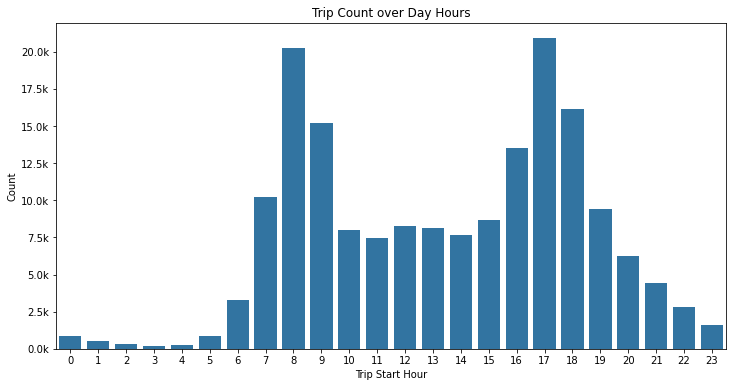

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[12,6])
sb.countplot(data=df, x='hour', color=base_color);
plt.xlabel('Trip Start Hour');
plt.title('Trip Count over Day Hours');
y_ticks= np.arange(0, 20000+2500, 2500);
y_label= ['{}'.format(str(v/1000) + 'k') for v in y_ticks];
plt.yticks(y_ticks, y_label);
plt.ylabel('Count');

## Distribution of Trips over Days

It is clear that number of trips is less on weekends than it is on weekdays, however on Wednesday 13th of Feb 2019, number of trips was 3077, which is similar to weekends.

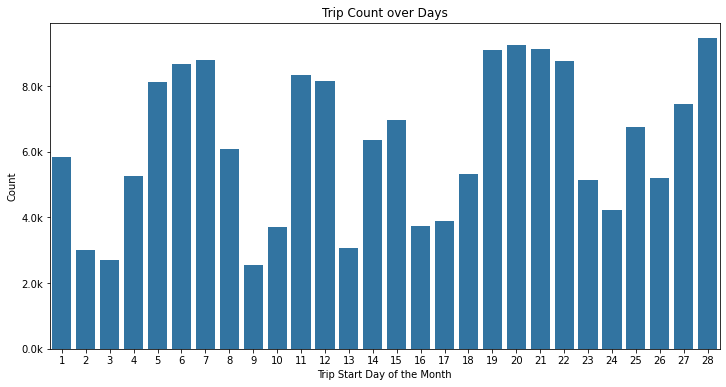

In [6]:
plt.figure(figsize=[12,6])
sb.countplot(data = df, x = 'day', color= base_color);
plt.xlabel('Trip Start Day of the Month');

plt.title('Trip Count over Days');
y_ticks= np.arange(0, 8000+2000, 2000);
y_label= ['{}'.format(str(v/1000) + 'k') for v in y_ticks];
plt.yticks(y_ticks, y_label);
plt.ylabel('Count');

## Distribution of Trips over Age

It is a right skewed distribution, with a mod at 31 years.

There is another spike at 26 years. The curve starts at 18, probably this is the youngest age allowed to use the bikes.

This distribution makes sense, as it is expected to see less number of bike trips with elder people, as most of them move less.

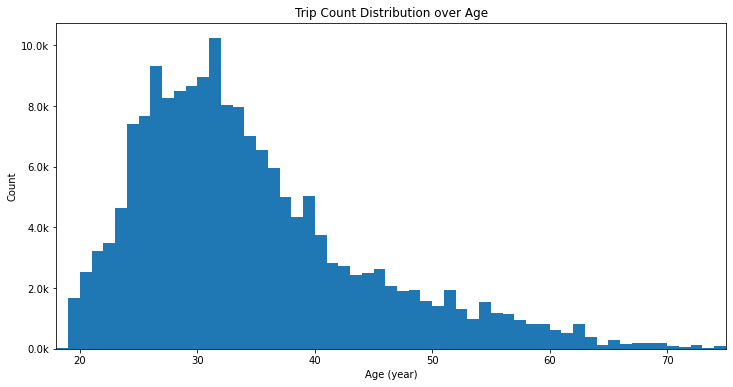

In [7]:
bin_size = 1
bins = np.arange(0, df.age.max()+bin_size, bin_size)
plt.figure(figsize=[12,6])
plt.hist(data = df, x = 'age', bins = bins);
plt.xlabel('Age (year)');
plt.title('Trip Count Distribution over Age');
y_ticks= np.arange(0, 10000+2000, 2000);
y_label= ['{}'.format(str(v/1000) + 'k') for v in y_ticks];
plt.yticks(y_ticks, y_label);
plt.ylabel('Count');
plt.xlim(18, 75);

## Trip Duration vs. User Age

We know already from the first graph that most of trips are short in duration. However, the graph below shows that longer durations are more often with younger users than elder users.

We can see also different durations concentrated in an unexpected manner at the Age of 30.

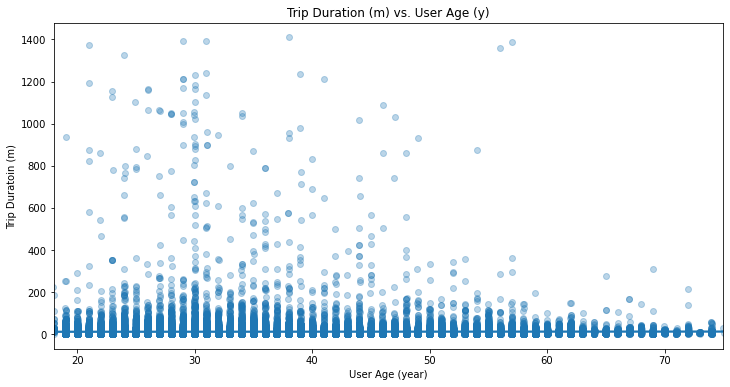

In [8]:
plt.figure(figsize=[12,6])
sb.regplot(data = df, x = 'age', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha': 3/10});

plt.xlabel('User Age (year)');
plt.title('Trip Duration (m) vs. User Age (y)');
plt.ylabel('Trip Duratoin (m)');

plt.xlim(18, 75);

## Trip Duration vs. User Age, for different genders and user types

Having a deeper look on the previous graph, we can see now the high concentration at the Age of 30 years old, is coming from users with "Other" gendre, and they are subscribers.

Further investigation should be done out the scope of this report, however a possible cause is having the subscriber data entry form with gender default on 'Other' and year of birth on 1989.

Aside of that, the graphs confirm our conclusion regarding the relationship between long trip durations and age.

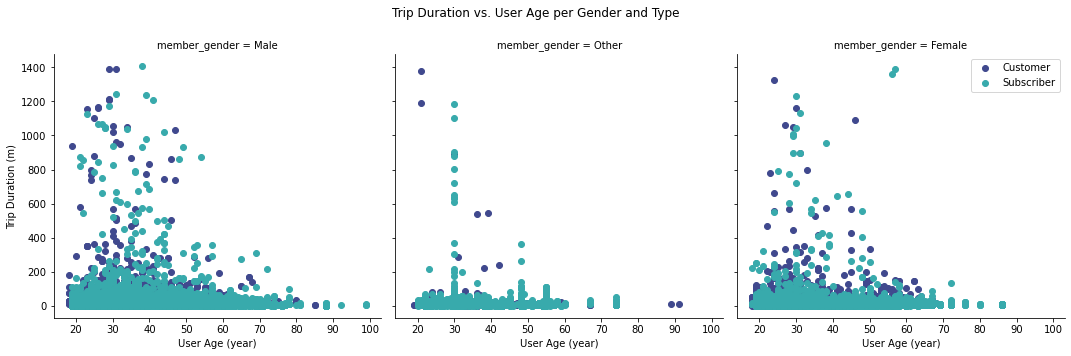

In [9]:
g=sb.FacetGrid(data=df, col='member_gender', height = 5, hue='user_type', margin_titles=True, palette='mako')
g.map(plt.scatter, 'age', 'duration_min');
g.fig.subplots_adjust(top=.85)
g.fig.suptitle('Trip Duration vs. User Age per Gender and Type')
axes = g.axes.flatten()
axes[0].set_ylabel("Trip Duration (m)")
for ax in axes:
    ax.set_xlabel("User Age (year)")
plt.legend();

## Trip Duration vs. Trip Start Hour

The graph shows a gap in durations for trips start 

From 12 am to 6 am trip durations tend to be short (less than an hour), from 8 am to 12 pm trip durations tend to be longer, we can see semi continous line at 8 am for durations up to 10 hours.

Interestingly, starting from 1 pm till the end of the day we can see gaps in each hour. It is clear between 1 pm and 4 pm, The upper and lower limits of the gaps decreases as we move towards the end of the day.

It looks like bike users tend to keep the bike to the next morning if the trip wasn't ended by the 10 or 11 pm., so for example trips started at 8 pm, either have durations less than 3 hours (till 11 pm) or longer than 11 hours (till 7 am or later).

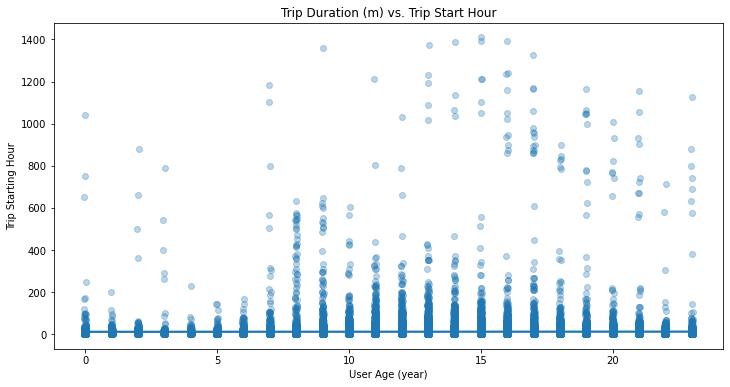

In [10]:
plt.figure(figsize=[12,6])
sb.regplot(data = df, x = 'hour', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha': 3/10});
plt.xlabel('User Age (year)');
plt.title('Trip Duration (m) vs. Trip Start Hour');
plt.ylabel('Trip Starting Hour');

## Average Trip Duration vs. Day per User Type

We can see that variation in average trip duration for Subscribers is very limited, it is around 10 minutes thoughout the month 

On the other hand, Average trip duration for Customers vaires between 13 40 minutes though out the month. It is longer in general comapred to average trip duraiton for Subscribers.

The interesting finding is that the average duration during weekends is considerably longer than it is during weekdays.

Recalling our previous observation regarding the fewer numbers on 13th, we can see shortest average duration for customers on the same day.

With some search on the internet, it turned out there was a winter storm hitting San Fransico bay area on that day.

In [11]:
def set_ticks(start_weekday, days):
    """ 
    Function to add week day abbreviated names to day numbers 
    Takes an interger represent the weekday of first day of the month, and the number of days
    """
    ticks = []
    weekdays = list(cl.day_abbr)
    for day in range(days):
        weekday = weekdays[(start_weekday + day)%7] + ' '+ str(day + 1)
        ticks.append(weekday)
    return ticks

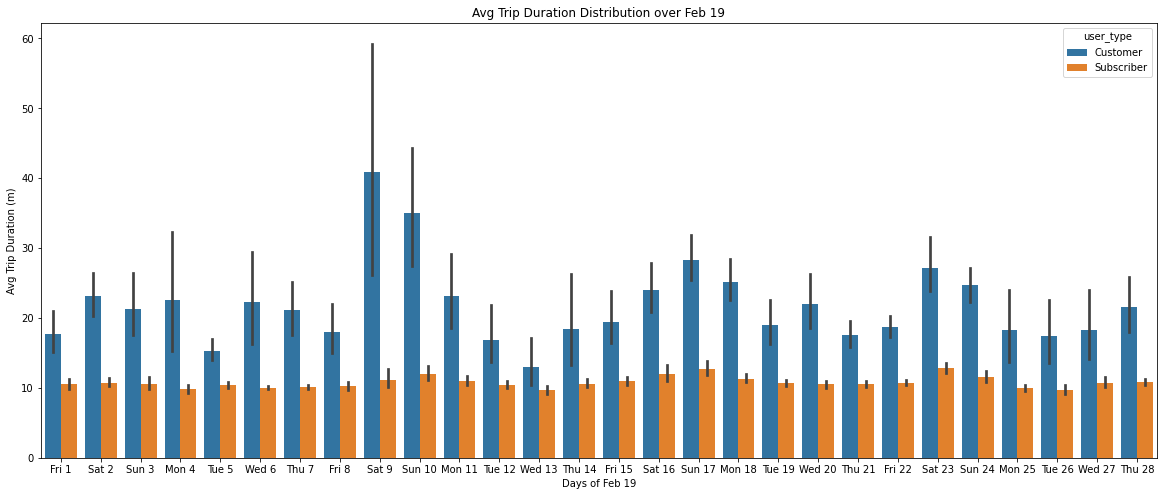

In [12]:
plt.figure(figsize=[20,8])
sb.barplot(data=df, x = 'day', y = 'duration_min', hue='user_type');
plt.title('Avg Trip Duration Distribution over Feb 19')
x_ticks = range(0, 28, 1)
x_labels = set_ticks(4, 28)
plt.xlabel('Days of Feb 19')
plt.ylabel('Avg Trip Duration (m)')
plt.xticks(x_ticks, x_labels);

In [13]:
!jupyter nbconvert slide_deck.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 819536 bytes to slide_deck.slides.html
